#  Basic arithmetic of vectors, matrices, and functions

In this notebook we review some arithmetic 



#  1.  Arithmetic of vectors

## Basic concepts

Vectors are just generalized scalars - and come in two forms: rows or columns.

A row vector is a long horizontal array of numbers like the one below.


$\mathbf{x}=\left[\begin{array}{ccc}
3.7 & 1 & 0.4\end{array}\right]$

The dimensions of this vector are 1 by 3 (or written 1 x 3 for short) - indicating it is a row vector with 3 entries.

The other type of vector is a column vector - a long vertical array of numbers like the one below.

$\mathbf{x}=\left[\begin{array}{c}
1\\
1\\
7\\
0.4
\end{array}\right]$

The dimensions of this vector are 4 by 1 (4 x 1 for short) - indicating it is a column vector with 4 entries.

We can flip or 'transpose' a column vector to make it a row vector, and vice versa.  This is denoted with a superscript 'T' - as in $\mathbf{x}^{T}$.

So for example if 

$\mathbf{x}=\left[\begin{array}{ccc}
3.7 & 1 & 0.4\end{array}\right]$  

is a 1x3 row vector then

$\mathbf{x}^{T}=\left[\begin{array}{c}
3.7\\
1\\
0.4
\end{array}\right]$

is a 3x1 column vector.  Whenever you transpose a vector you always switch its dimensions - so a 1xN vector becomes an Nx1 vector after transposing (and vice versa).

Note: a general 1xN row vector is denoted by 

$\mathbf{x}=\left[\begin{array}{cccc}
x_{1} & x_{2} & \cdots & x_{N}\end{array}\right]$

and its transpose - an Nx1 column vector - can be written using transpose notation as 


$\mathbf{x}=\left[\begin{array}{cccc}
x_{1} & x_{2} & \cdots & x_{N}\end{array}\right]^{T}$

Lets look at this functionality in Python's Numpy library - a great library for performing computations with vectors and matrices.

In [3]:
import numpy as np       # import statement for numpy
x = np.asarray([3.7,1,0.4])

Note that by default an array initialized in this way is *dimensionless* - which you can see by printing its shape as follows.

In [4]:
print np.shape(x)

(3,)


We can re-shape this array as a row vector by performing the following action.

In [7]:
x.shape = (1,3)     # this reshapes the array as a row vector
print np.shape(x)

(1, 3)


To shape this array as a column we use a similar line as follows.

In [8]:
x.shape = (3,1)
print np.shape(x)

(3, 1)


We can also transpose a numpy vector by writing --> x.T   Print this out we can see that the vector is indeed transposed.

In [11]:
print 'the original vector - is a column vector'
print x
print 'the transpose is a row vector'
print x.T

the original vector - is a column vector
[[ 3.7]
 [ 1. ]
 [ 0.4]]
the transpose is a row vector
[[ 3.7  1.   0.4]]


## Adding and subtracting vectors

Adding and subtracting vectors is just like adding and subtracting scalars - with one caveat: you can only add vectors that have the same dimensions.  So you *can't* add two row vectors of different lengths, or a row vector and column vector.  So for example to add two Nx1 column vectors 

$\mathbf{x}=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{array}\right],\,\,\,\,\,\,\,\mathbf{y}=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right]$

we add them *entry-wise* as 

$\mathbf{x}+\mathbf{y}={\left[\begin{array}{c}
x_{1}+y_{1}\\
x_{2}+y_{2}\\
\vdots\\
x_{N}+y_{N}
\end{array}\right]}$

The same holds for subtraction - its done entrywise.

Lets try some addition experiments in numpy.

In [12]:
x = np.array([1,4,2])
x.shape = (3,1)
y = np.array([0,3,8])
y.shape = (3,1)
print (x+y)

[[ 1]
 [ 7]
 [10]]


But if we try to add two vectors that aren't the same shape - we'll get into trouble - and numpy will throw an error reflecting this.

In [15]:
x = np.array([1,4])
x.shape = (2,1)
y = np.array([0,3,8])
y.shape = (3,1)
print (x+y)

ValueError: operands could not be broadcast together with shapes (2,1) (3,1) 

## Multiplying a vector by a scalar

We can multiply vectors by a scalar in a natural way - to multiply a vector by a scalar multiply each entry of the vector by that scalar.  

For example, to multiply the vector 


$\mathbf{x}=\left[\begin{array}{c}
2\\
4\\
1
\end{array}\right]$


by 3 we have


$3\cdot\mathbf{\mathbf{x}}=\left[\begin{array}{c}
3\cdot2\\
3\cdot4\\
3\cdot1
\end{array}\right]=\left[\begin{array}{c}
6\\
12\\
3
\end{array}\right]$

In Python we can compute this simply as 

In [51]:
x = np.array([2,4,1])
x.shape = (3,1)
print 3*x

[[ 6]
 [12]
 [ 3]]


This holds in general for a general Nx1 vector $\bf{x}$ - to multiply it by any scalar $\alpha$ we compute

$\alpha\cdot\mathbf{x}=\left[\begin{array}{c}
\alpha\cdot x_{1}\\
\alpha\cdot x_{2}\\
\vdots\\
\alpha\cdot x_{N}
\end{array}\right]$

## Multiplying two vectors - the inner product

Multiplying vectors generalizes the concept of multiplication of scalar values.  To multiply to Nx1 length vectors we multiply them entry-wise and add up the result - **giving a scalar value** (just like scalar multiplication).  That is 

$\mathbf{x}^{T}\mathbf{y}=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{array}\right]^{T}\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right]=x_{1}y_{1}+x_{2}y_{2}+\cdots x_{N}y_{N}$


Using summation notation we can write this more compactly.  Summation notation zips up - notationally speaking - sums.  For example, to sum up $N$ numbers $a_1, a_2,...,a_N$ we can write 

$a_1 + a_2 + ... + a_N = \sum_{n=1}^{n=N}a_n$

We can write the mutliplication of two vectors compactly then as 

$\mathbf{x}^{T}\mathbf{y}=x_{1}y_{1}+x_{2}y_{2}+\cdots x_{N}y_{N}=\sum_{n=1}^{n=N}{x_ny_n}$

This vector multiplication is known as the **inner product**.  

Lets try computing the inner product using numpy and a few example vectors.  Note that in order to compute the inner product in numpy you must use the np.dot function.  

In [27]:
x = np.array([1,4,2])
x.shape = (3,1)
y = np.array([0,3,8])
y.shape = (3,1)
print (np.dot(x.T,y))[0][0]

28


Notice how writing x*y in Python does not give you a single - this gives a vector whose entries are the product of the entries of each vector.  e.g., 

In [22]:
print x*y

[[ 0]
 [12]
 [16]]


So another way to get the inner product is to sum this entry-wise vector multiplication.

In [26]:
print np.sum(x*y)
print np.dot(x.T,y)[0][0]

28
28


# TODO

### TODO

Verify whether the following relationship involving the inner product 

$\left(\mathbf{x}+\mathbf{y}\right)^{T}\mathbf{z}=\mathbf{x}^{T}\mathbf{z}+\mathbf{y}^{T}\mathbf{z}$

is true or false.  

Creating a few test vectors using numpy to check see if the relationship holds for them numerically.

## Multiplying two vectors - the outer product

Another way to multiply vectors is called the **outer product**.  This is defined for two Nx1 column vectors $\bf{x}$ and $\bf{y}$

$\mathbf{x}=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{array}\right],\,\,\,\,\,\,\,\mathbf{y}=\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right]$


as


$\mathbf{x}\mathbf{y}^{T}=\left[\begin{array}{c}
x_{1}\\
x_{2}\\
\vdots\\
x_{N}
\end{array}\right]\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{N}
\end{array}\right]^{T}=\left[\begin{array}{cccc}
x_{1}y_{1} & x_{1}y_{2} & \cdots & x_{1}y_{N}\\
x_{2}y_{1} & x_{2}y_{2} &  & \vdots\\
\vdots &  & \ddots & \vdots\\
x_{N}y_{1} & \cdots & \cdots & x_{N}y_{N}
\end{array}\right]$


So for example, for two vectors 

$\mathbf{x}=\left[\begin{array}{c}
2\\
4\\
1
\end{array}\right]\,\,\,\,\mathbf{y}=\left[\begin{array}{c}
3\\
0\\
5
\end{array}\right]$

the outer product is 

$\mathbf{x}\mathbf{y}^{T}=\left[\begin{array}{ccc}
2\cdot3 & 2\cdot0 & 2\cdot5\\
4\cdot3 & 4\cdot0 & 4\cdot5\\
1\cdot3 & 1\cdot0 & 1\cdot5
\end{array}\right]=\left[\begin{array}{ccc}
6 & 0 & 10\\
12 & 0 & 20\\
3 & 0 & 5
\end{array}\right]$

In Python we can compute this outer product as 

In [28]:
x = np.array([2,4,1])
x.shape = (3,1)
y = np.array([3,0,5])
y.shape = (3,1)
print x*y.T

[[ 6  0 10]
 [12  0 20]
 [ 3  0  5]]


### TODO

Verify whether the following relationship involving the outer product 

$\left(\mathbf{x}+\mathbf{y}\right)\mathbf{z}^{T}=\mathbf{x}\mathbf{z}^{T}+\mathbf{y}\mathbf{z}^{T}$

is true or false.

Creating a few test vectors using numpy to check see if the relationship holds for them numerically.

# 2.  Arithmetic with matrices

This works analagously to that of vectors.  e.g., you can only add matrices of the same size, multiplication works as an inner product, etc.,  For further info [see this appendix document](http://media.wix.com/ugd/f09e45_5e6ded23bdae4f84aeeedec53a909a35.pdf).[1]

The most important concept for our purposes is how to multiply a matrix times a vector.

# 3 Arithmetic operations on functions

Functions

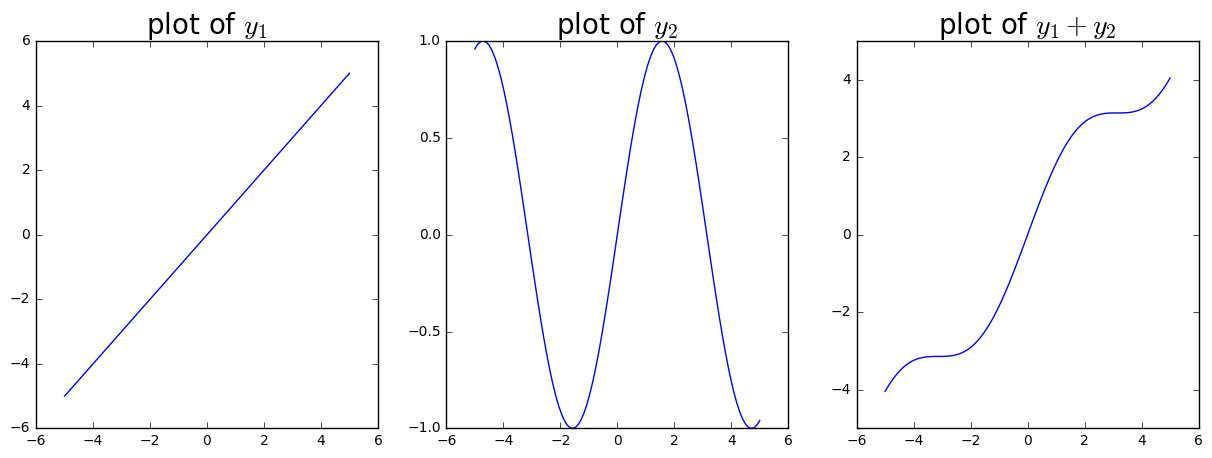

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

# initialize panels
fig = plt.figure(num=None, figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
        
# 
x = np.linspace(-5,5,100)
y1 = x
y2 = np.sin(x)
y = y1 + y2

# plot each panel
ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y1 + y2)

# label and clean up each panel
ax1.set_title('plot of $y_1$',rotation = 0,fontsize = 20)
ax2.set_title('plot of $y_2$',rotation = 0,fontsize = 20)
ax3.set_title('plot of $y_1 + y_2$',rotation = 0,fontsize = 20)

# Approximating vectors using sums of vectors

# Approximating functions using sums of functions